TITLE:
The Impact of Sex and Native Country on Education Level 

INTRODUCTION:
Education inequality is prevalent all over the world and is caused by many factors (including native country, race, and sex etc.). We wish to discover a relationship between sex, race, and native country and their impact on educational inequality through statistical analysis and data visualization in order to close the education disproportion and fix these inequality issues.

QUESTION:
Given a persons sex, race, and native country, what is their education level? 

DATASET:
[Census Income Data Set.](https://archive.ics.uci.edu/ml/datasets/Census+Income)
This dataset contains 15 different attributes (age, race, sex, marrital status, work class, occupation, capital gain, income level, education level, etc.). Each row represents one person. As you go across the row it lists their information based on those 15 attributes. The data extraction was completed by Barry Becker and its original prediction task was to determine whether a person makes over $50k per year. Though in our data analysis we want to predict education levels.

In [1]:
set.seed(1)

library(tidyverse)
library(tidymodels)
library(repr)
library(rvest)
library(stringr)
library(cowplot)
source('tests.R')
source("cleanup.R")
options(repr.matrix.max.rows = 6)

show_digit = function(arr784, col = gray(12:1 / 12), ...) {
  arr784$X <- 0  # avoid dark pixel in top left
  image(matrix(as.matrix(arr784[-785]), nrow = 28)[, 28:1], col = col, ...)
}

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


WHY WE CHOSE THESE ATTRIBUTES TO WORK WITH:

We decided that race, sex, and native country would likely be the largest contributers to education level since other attributes were either unrelated, or the data was too messy/biased. Depending on the country, women are often given less opportunities than men. Race is also related to native countries, as several countries are not very diverse and are dominated by a single race. Some countries get little to no educational funding, leading to that country (and race overall) to have lower education levels. Additionally, in past generations, due to racism, people of colour were provided with less or worse education, impacting the distribution of adult education levels today. 

In [2]:
education_data <- read.csv("https://drive.google.com/uc?export=download&id=1NaiDw1Sow9z2Msgl9-pKJEN4iPlOmW3W")

education_select <- education_data |>
                    filter(!(Native.country == "United-States"), !(Native.country == "?"), na.rm = TRUE) |>
                    select(Sex, Race, Native.country, Education.level) |>
                    mutate(Sex = as.factor(Sex), 
                           Native.country = as.factor(Native.country), 
                           Education.level = as.factor(Education.level),
                           Race = as.factor(Race))
# head(education_select)
education_select

education_proportions <- education_select |>
                      group_by(Education.level) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(education_select))
education_proportions

Sex,Race,Native.country,Education.level
<fct>,<fct>,<fct>,<fct>
Female,Black,Cuba,Bachelors
Female,Black,Jamaica,9th
Male,Asian-Pac-Islander,India,Bachelors
Male,Amer-Indian-Eskimo,Mexico,7th-8th
Male,Asian-Pac-Islander,South,Some-college
Male,White,Puerto-Rico,11th
Female,White,Honduras,Prof-school
Male,White,Mexico,5th-6th
Male,White,Puerto-Rico,Assoc-voc


Education.level,n,percent
<fct>,<int>,<dbl>
10th,73,2.599715
11th,100,3.561254
12th,52,1.851852
1st-4th,117,4.166667
5th-6th,221,7.870370
7th-8th,128,4.558405
9th,111,3.952991
Assoc-acdm,73,2.599715
Assoc-voc,77,2.742165


Data above is already in a tidy format and ready to be split into training and testing data!

SUMMARIZING, AND VISUALIZING EACH PREDICTOR VARIABLE AGAINST EDUCATION LEVEL:

Rows: 1,964
Columns: 4
$ Sex             <fct> Female, Female, Male, Female, Male, Female, Male, Fema…
$ Race            <fct> Black, White, White, Asian-Pac-Islander, White, White,…
$ Native.country  <fct> Cuba, Honduras, Cuba, Philippines, Poland, Columbia, I…
$ Education.level <fct> Bachelors, Prof-school, Bachelors, Bachelors, Bachelor…
Rows: 844
Columns: 4
$ Sex             <fct> Female, Male, Male, Male, Female, Male, Male, Female, …
$ Race            <fct> Black, Asian-Pac-Islander, Amer-Indian-Eskimo, White, …
$ Native.country  <fct> Jamaica, India, Mexico, Puerto-Rico, England, Germany,…
$ Education.level <fct> 9th, Bachelors, 7th-8th, 11th, Assoc-acdm, Bachelors, …


Education.level,n,percent
<fct>,<int>,<dbl>
10th,57,2.902240
11th,79,4.022403
12th,45,2.291242
1st-4th,86,4.378819
5th-6th,144,7.331976
7th-8th,89,4.531568
9th,72,3.665988
Assoc-acdm,48,2.443992
Assoc-voc,53,2.698574


Education.level,n
<fct>,<int>
10th,57
11th,79
12th,45
1st-4th,86
5th-6th,144
7th-8th,89
9th,72
Assoc-acdm,48
Assoc-voc,53


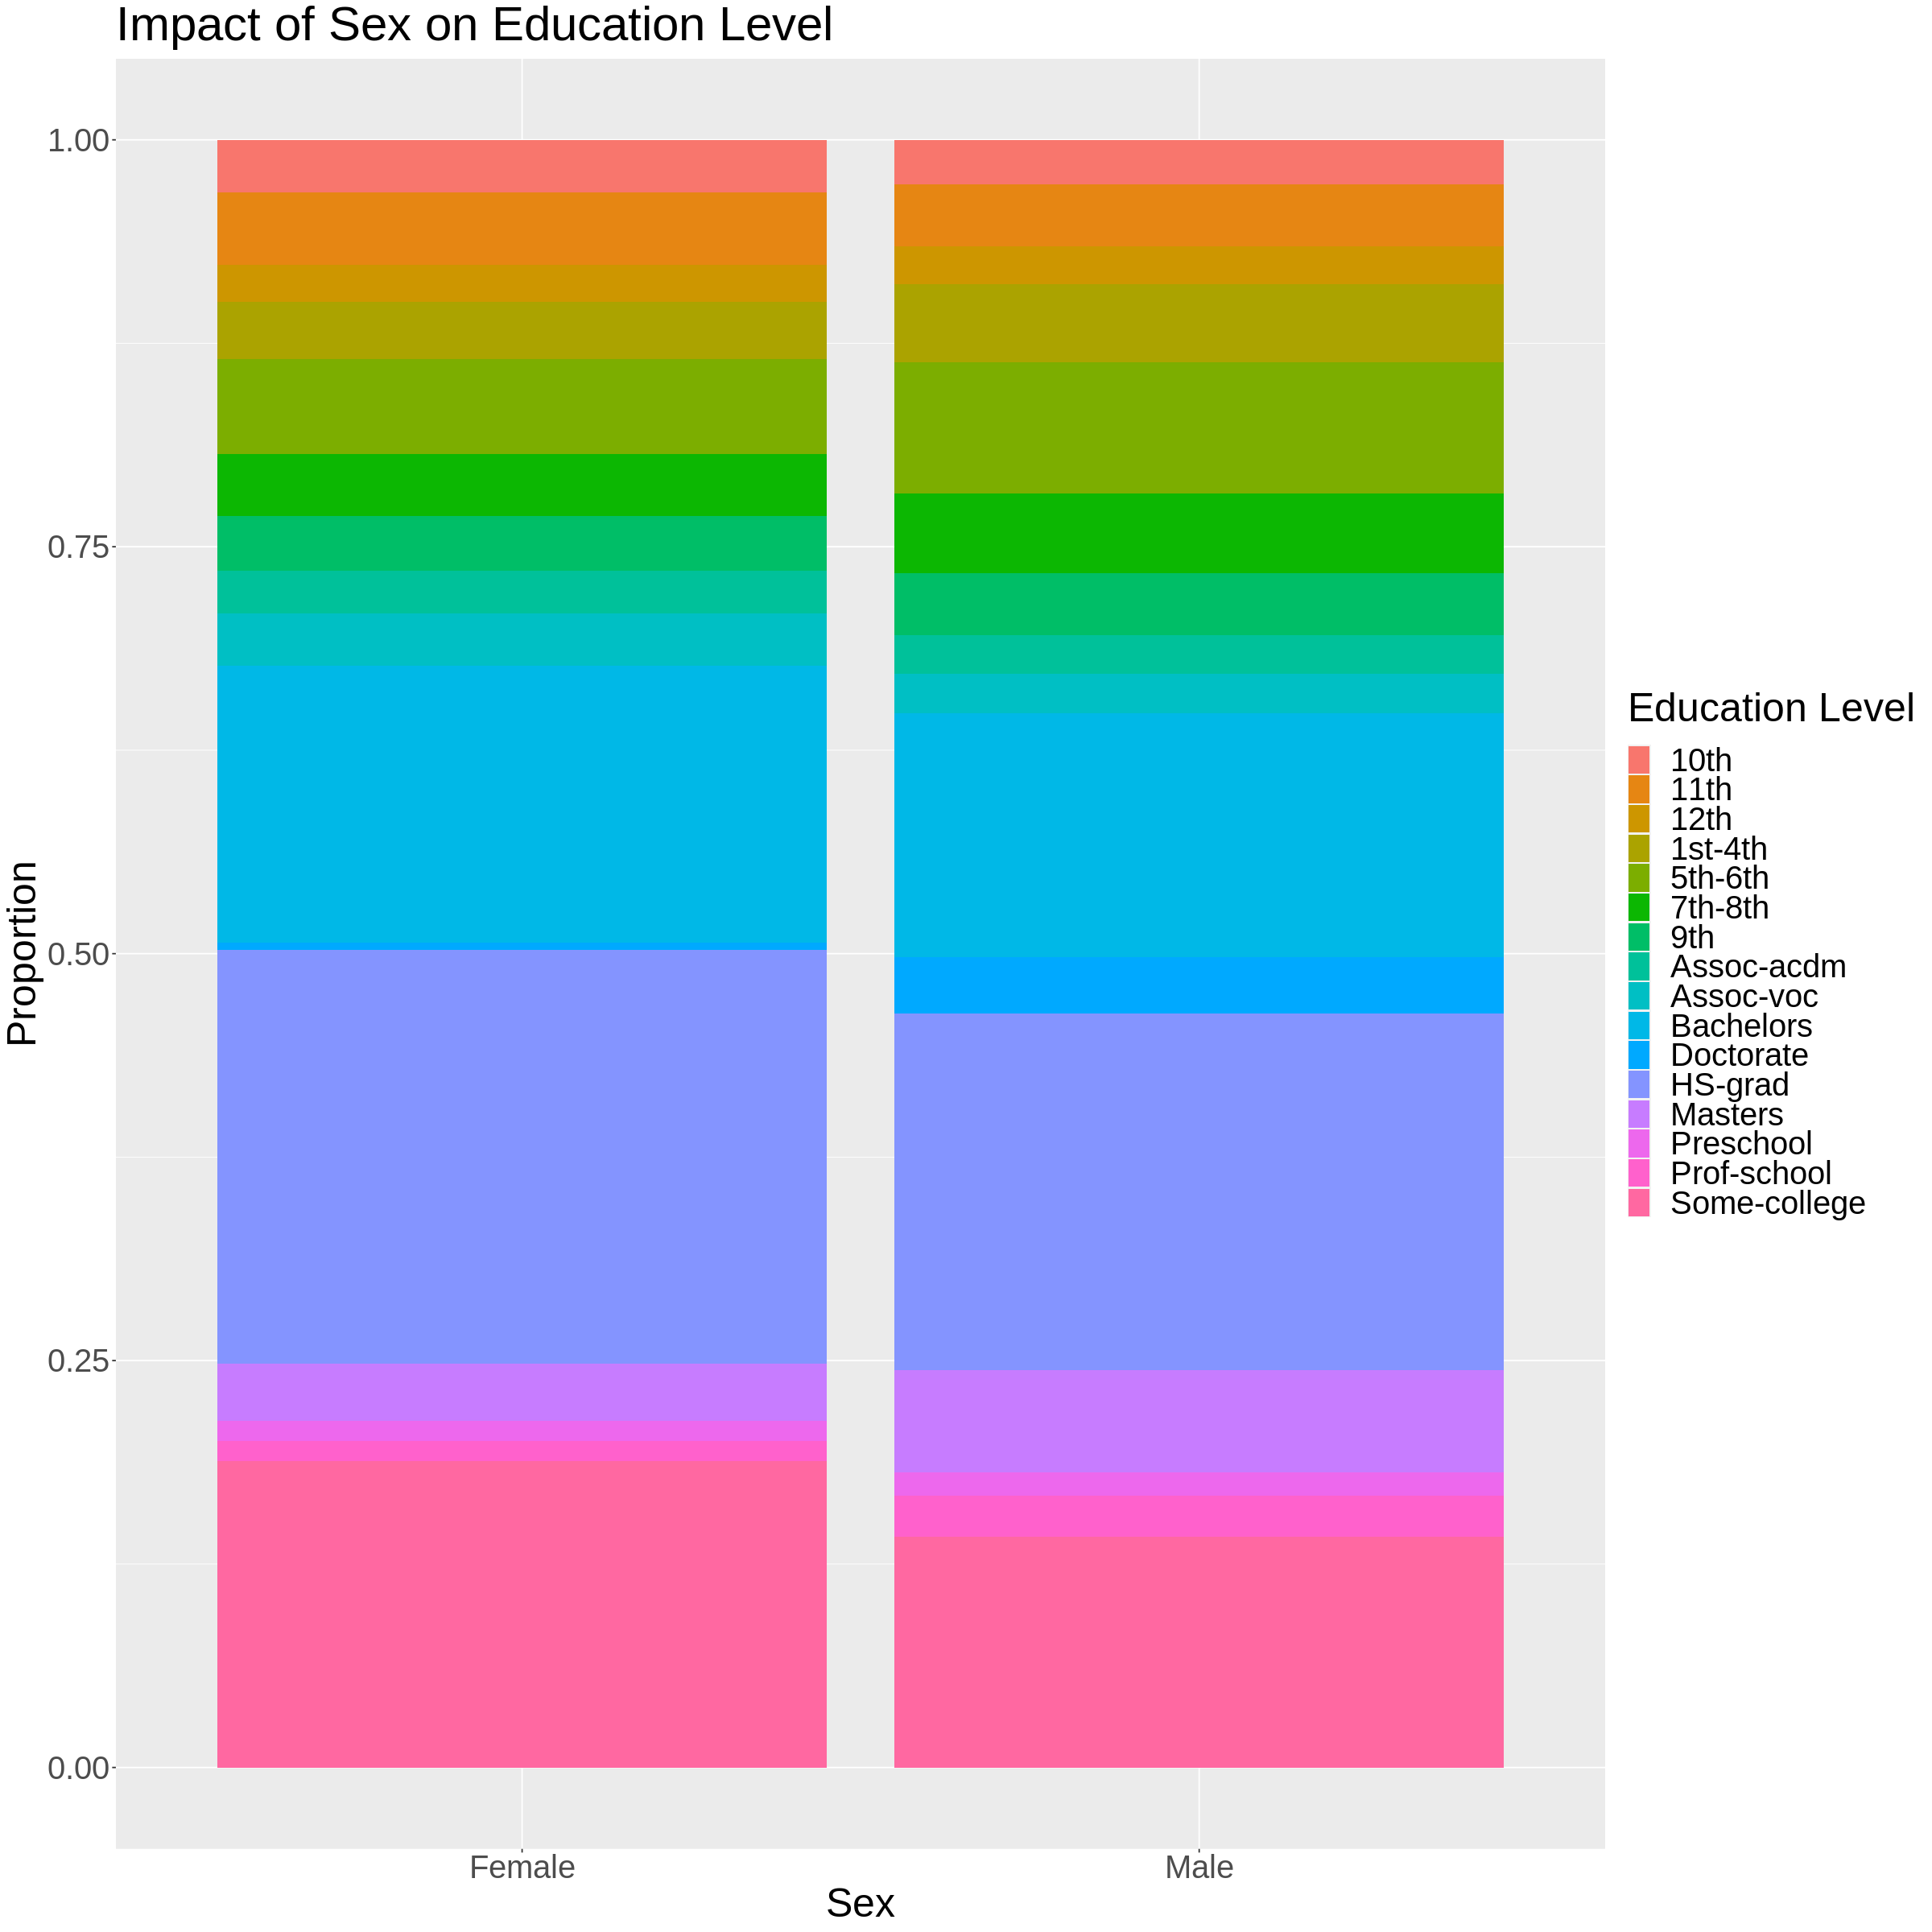

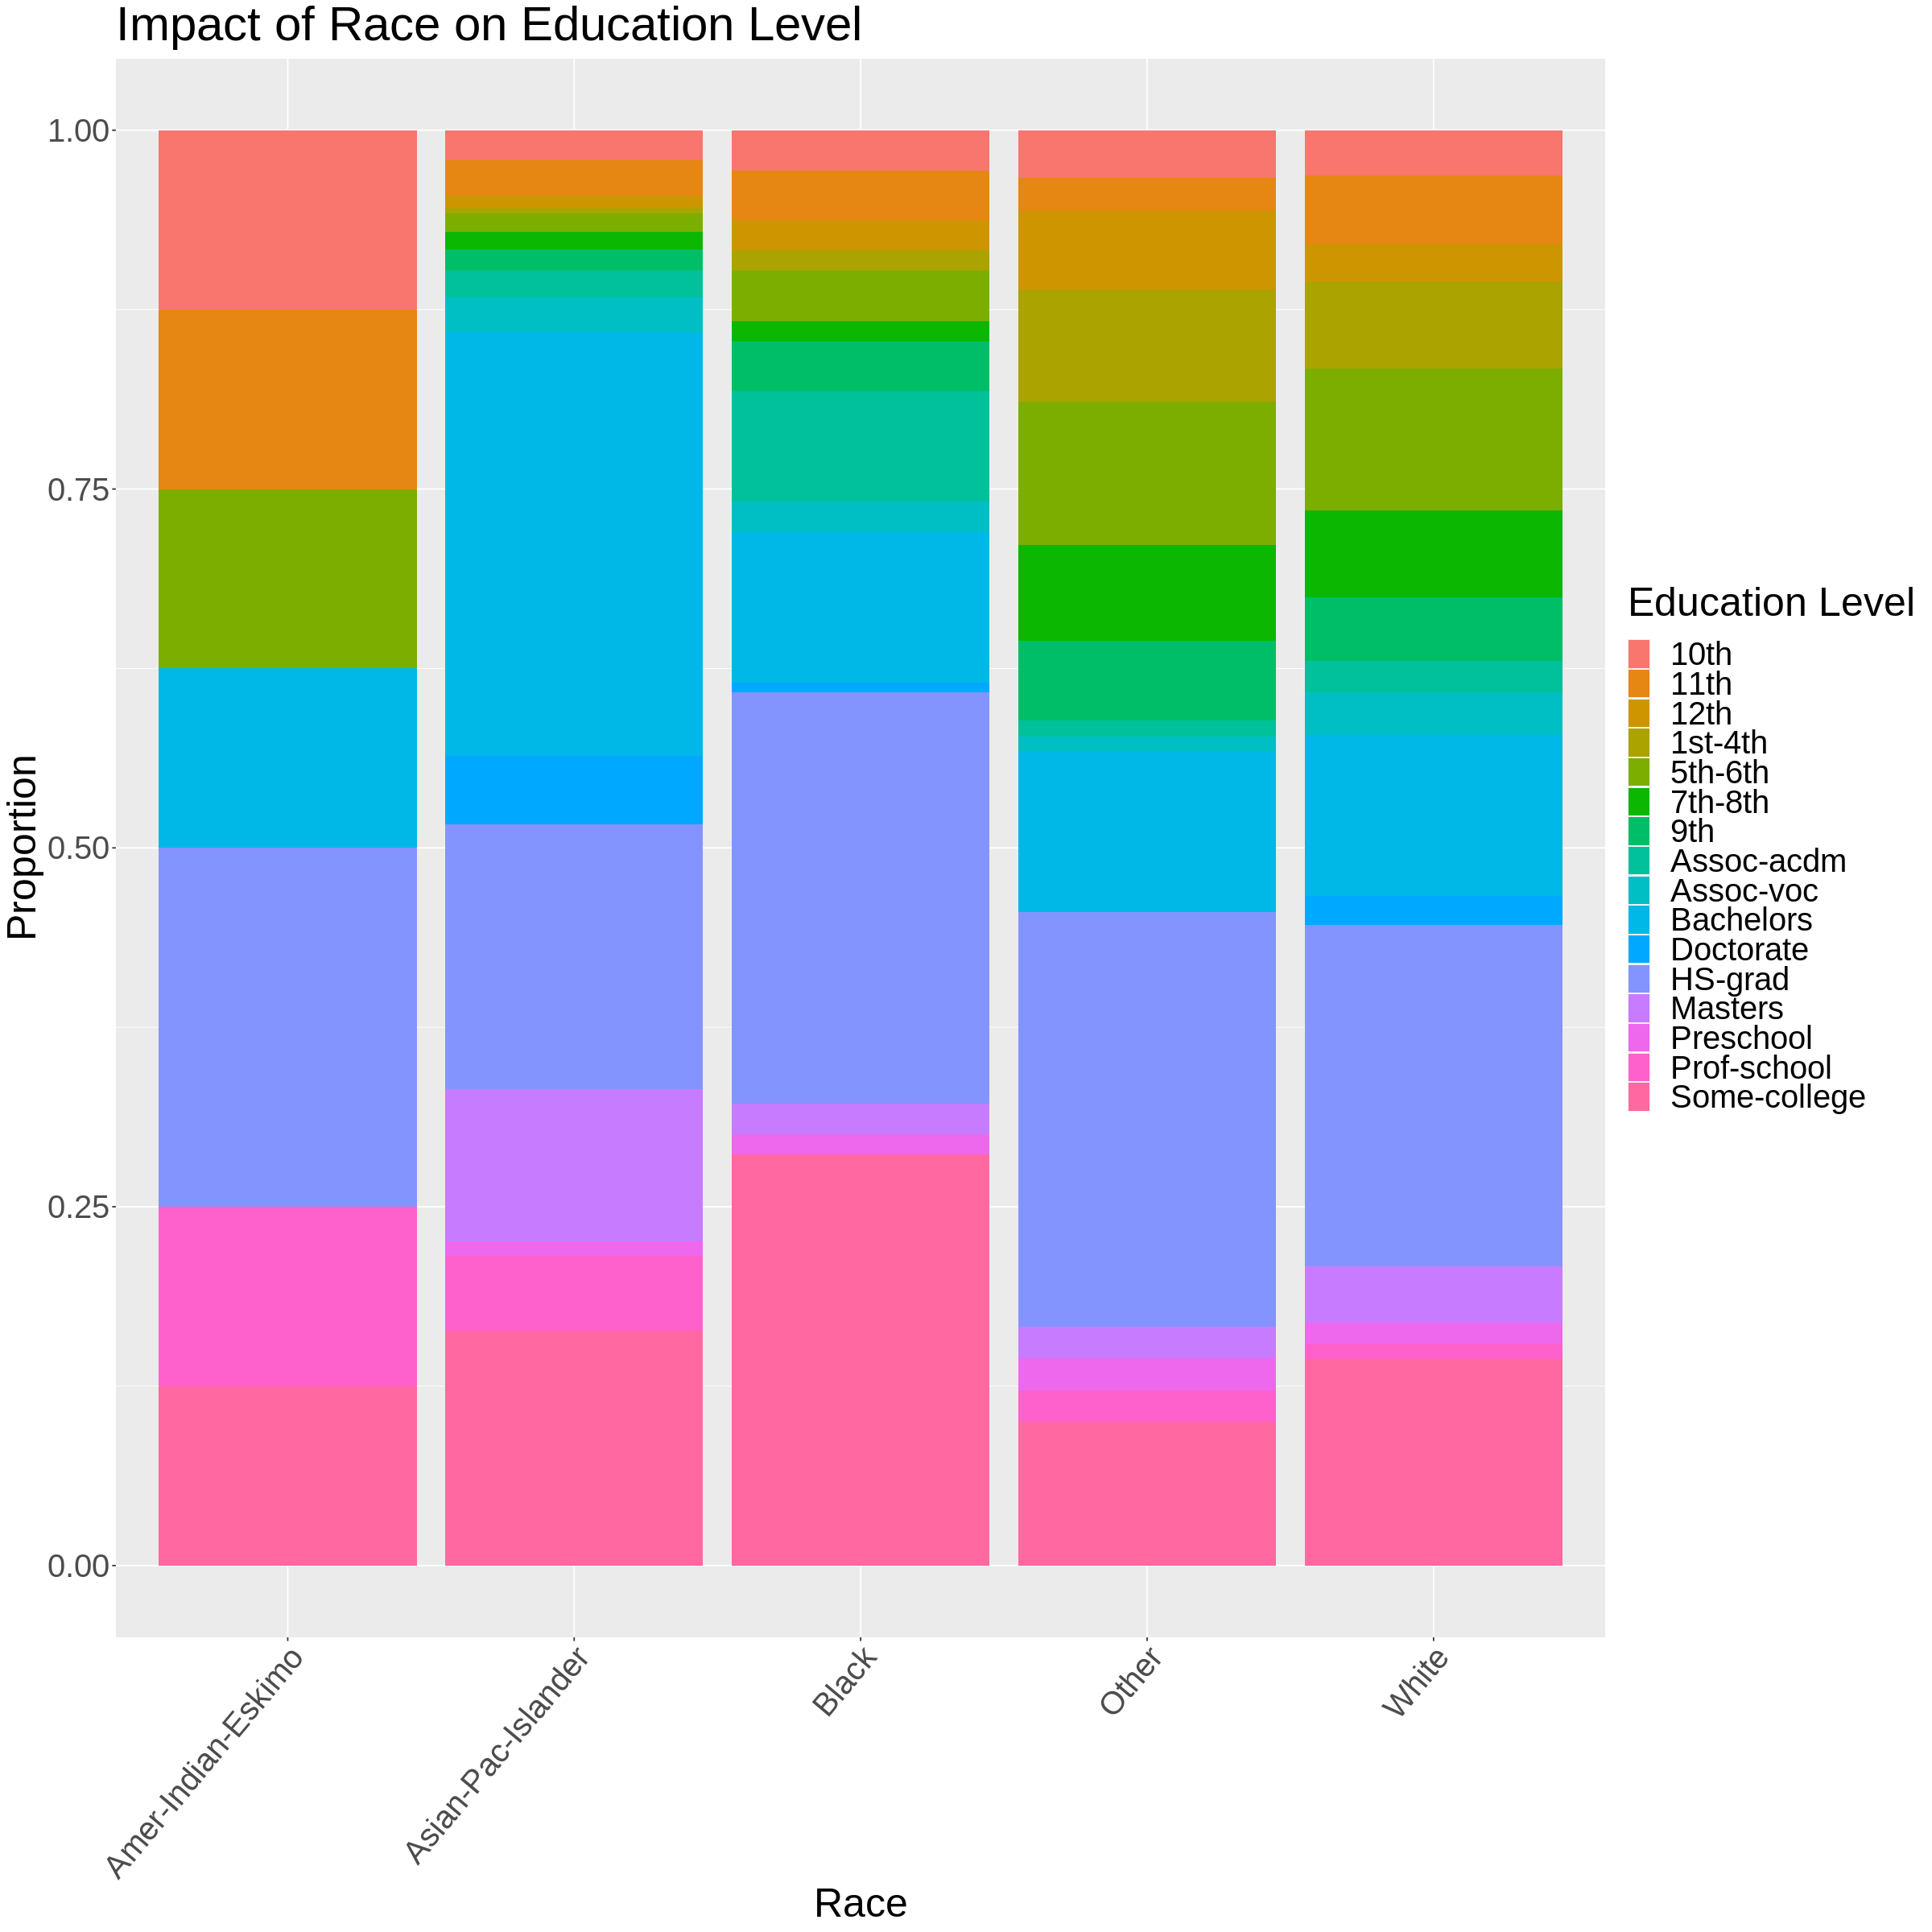

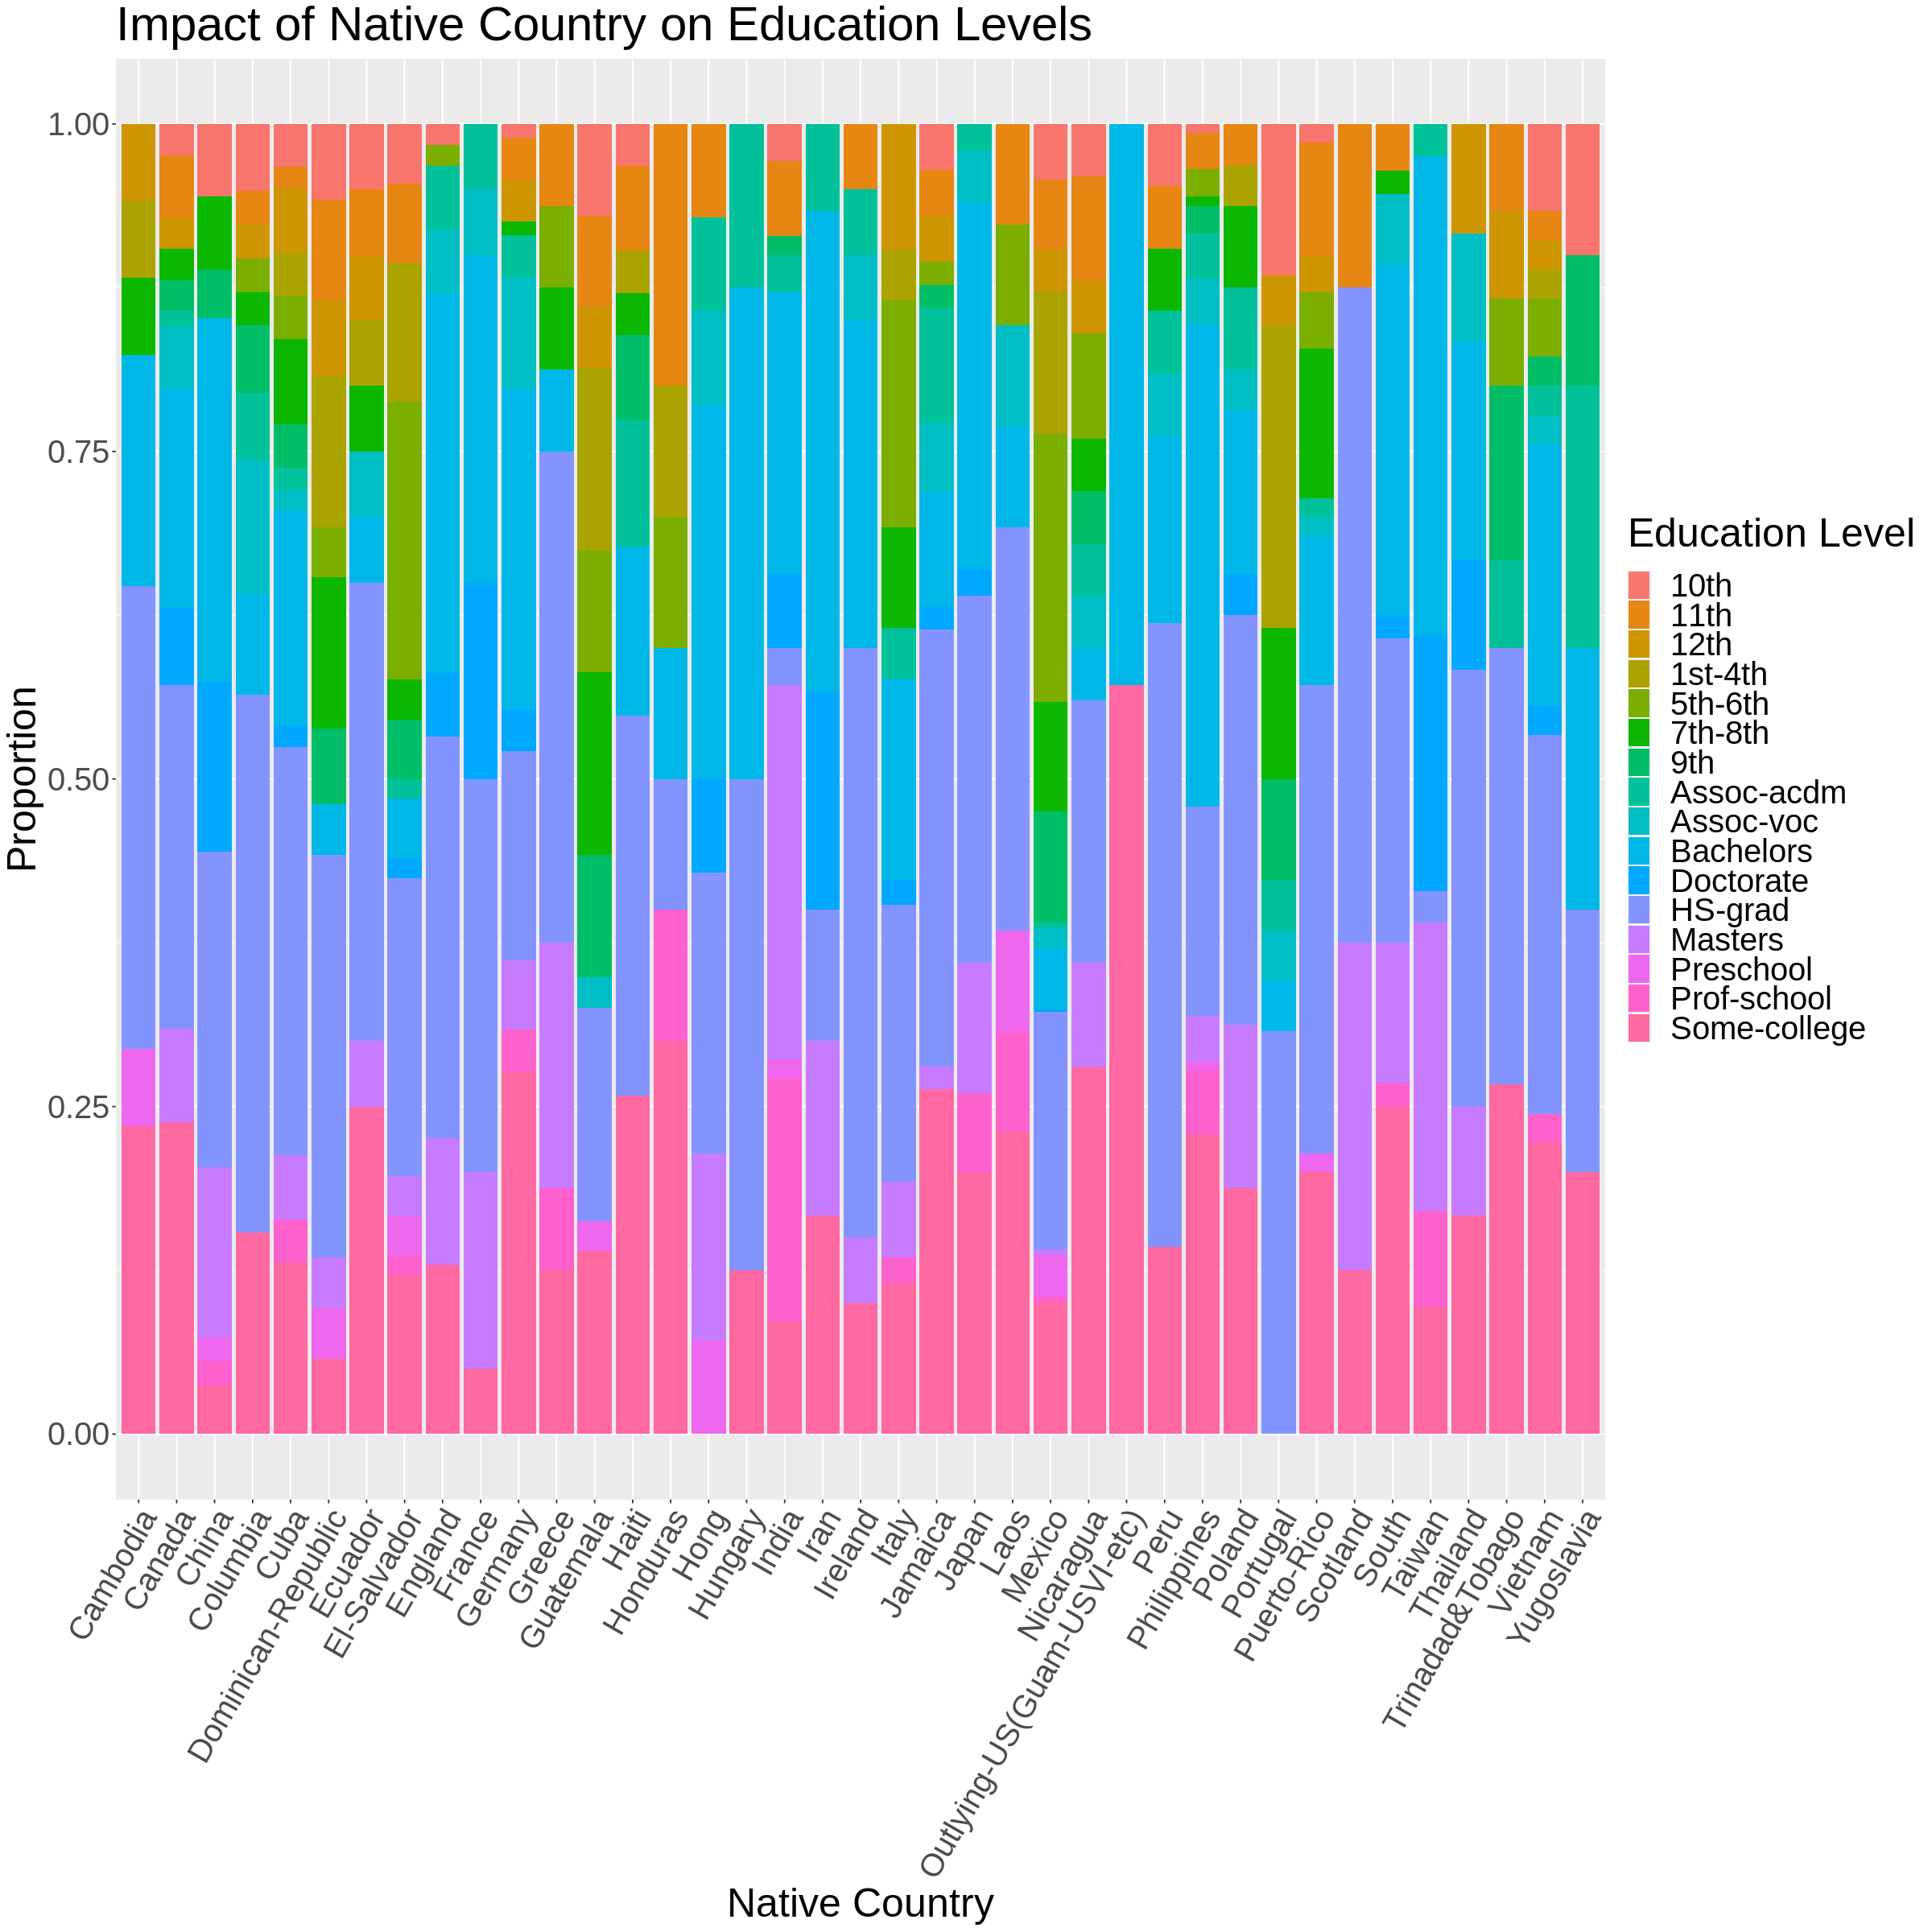

In [4]:
education_split <- initial_split(education_select, prop = 0.70, strata = Education.level)
education_train <- training(education_split)
education_test <- testing(education_split)

glimpse(education_train)
glimpse(education_test)

#making sure training data proportions are correct:

split_education_proportions <- education_train |>
                      group_by(Education.level) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(education_train))
split_education_proportions

#summarizing into a table to see how many observations there are for each education level:

education_level_table <- education_train |>
                      group_by(Education.level) |>
                      summarize(n = n())
education_level_table

#visualizing each predictor variable:

options(repr.plot.width = 20, repr.plot.height = 20)

sex_education_plot <- education_train |>
  ggplot(aes(x = Sex, fill = Education.level)) +
  geom_bar(position = "fill") +
  labs(x = "Sex",
       y = "Proportion",
       fill = "Education Level",
      title = "Impact of Sex on Education Level") +
    theme(text = element_text(size = 30))
sex_education_plot

race_education_plot <- education_train |>
  ggplot(aes(x = Race, fill = Education.level)) +
  geom_bar(position = "fill") +
  labs(x = "Race",
       y = "Proportion",
       fill = "Education Level",
      title = "Impact of Race on Education Level") +
    theme(text = element_text(size = 30)) +
 theme(axis.text.x = element_text(angle = 50, hjust = 1))
race_education_plot

country_education_plot <- education_train |>
  ggplot(aes(x = Native.country, fill = Education.level)) +
  geom_bar(position = "fill") +
  labs(x = "Native Country",
       y = "Proportion",
       fill = "Education Level",
      title = "Impact of Native Country on Education Levels") +
    theme(text = element_text(size = 30)) +
   theme(axis.text.x = element_text(angle = 60, hjust = 1))
country_education_plot

Proportions of the original data set (education_data) and the training set (education_train) have very similar, nearly identical proportions of each education level!

METHODS:

To conduct our data analysis we will use the sex, native country, and education level columns. Then filter to remove native country rows with “United States” because this dataset has an extremely large amount of data from the United States compared to other countries. Our prediction will now be less biased. We will also arrange the levels of education from lowest to highest. Next, we made sure our data is tidy (it is). Then, split data into training and testing sets, scale it, and complete a workflow analysis. After that we can predict the labels in the test set, compute the accuracy, analyze how well the classifier performed, tune the classifier, and finally use cross-validation to select the best parameter.

We will visualize our results by comparing three bar graphs; one on the proportion of education levels against sex, one of education level proportions against race, and finally one with education level proportion against native country. The bars will be coloured according to the level of education (ex. Secondary, post secondary, bachelors, PhD). This will create an effective comparison of the trends between our predictors and education level.

EXPECTED OUTCOMES AND SIGNIFICANCE:

We are expecting to find that white males from first world countries will have the highest education level. This is because white males are given access to many more opportunities than any other sex, race, or nationality. 

These findings could impact how education systems work and hopefully encourage other countries and institutions to prioritize education, diversity, and equality. They could also guide further research to help improve global education levels.

This could make us wonder which factors are the greatest contributors to education level? How can we get different countries to the same level in terms of education? Why do certain marginalized groups have less access to education? Do most people who don’t attend a post-secondary institution do so by choice, or because they face a barrier?